In [1]:
!pip install yfinance

In [2]:
#initiating libraries
import pandas as pd
import yfinance as yf
import numpy as np
import statsmodels.tsa.stattools as st
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
aapl = yf.Ticker("aapl")
aapl

yfinance.Ticker object <AAPL>

In [4]:
#using historic module
aapl_historic = aapl.history(start="2000-01-01", end="2010-01-01", interval="1d")
#print(aapl_historic)

In [5]:
data = yf.download(["KO", "PEP"], start="2010-01-01", end="2023-01-01", auto_adjust=False, interval="1d")['Adj Close'] 
#downloaded adjusted close prices for the KO and PEP stocks, stored in data 

[*********************100%***********************]  2 of 2 completed


In [6]:
data.head()

Ticker,KO,PEP
Date,,
2010-01-04,17.557863,38.333931
2010-01-05,17.345469,38.797146
2010-01-06,17.339308,38.409058
2010-01-07,17.296215,38.164921
2010-01-08,16.976099,38.039734


Text(0.5, 0, 'Time')

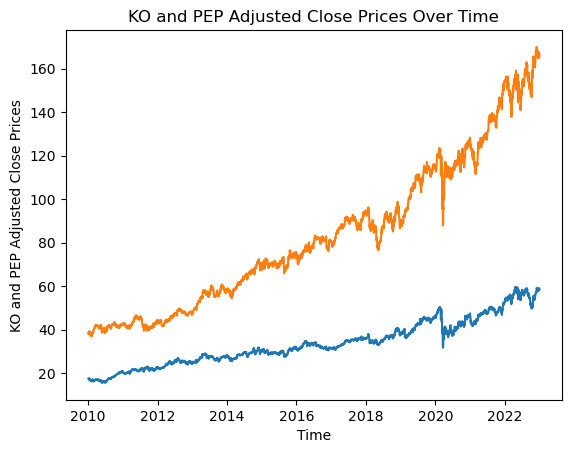

In [7]:
#attempt to plot
x = data.index
y = data.values
plt.plot(x, y)
plt.title("KO and PEP Adjusted Close Prices Over Time")
plt.ylabel("KO and PEP Adjusted Close Prices")
plt.xlabel("Time")


In [8]:
#calculate the cointegration 
tstat, pval, cval = st.coint(data["KO"], data["PEP"])
#looking for less than 0.05 for an alternate hypothesis => cointegration
significant = pval < 0.05
print("p-value is",pval,", p-value < 0.05(5% significance)?", significant)

p-value is 0.004578827496716998 , p-value < 0.05(5% significance)? True


In [9]:
#divide each value of the data for KO and PEP by their initial values
#normalised_KO = data["KO"]/data["KO"].iloc[0]
#going to define a function for future use
def normalise(stock):
    return stock/stock.iloc[0]
#store in dictionary list
normalised = {}
normalised["KO"] = normalise(data["KO"])
normalised["PEP"] = normalise(data["PEP"])

Text(0, 0.5, 'Price/initial price')

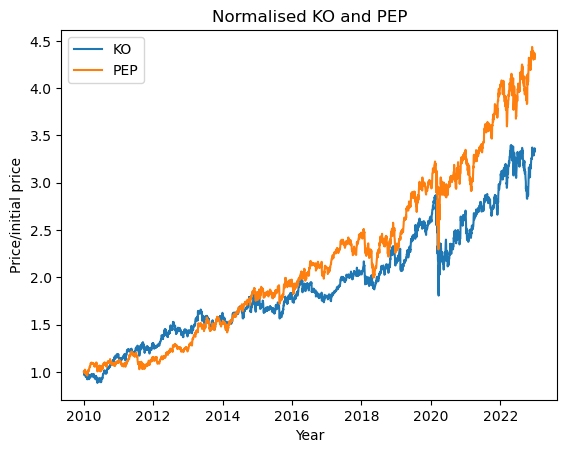

In [10]:
#plot graph of normalised stocks 
#x = data.index is already defined further up
y1 = normalised["KO"]
y2 = normalised["PEP"]
plt.plot(x, y1, label="KO")
plt.plot(x, y2, label="PEP")
plt.legend()
plt.title("Normalised KO and PEP")
plt.xlabel("Year")
plt.ylabel("Price/initial price")

In [11]:
#create function
def percent_change(stock):
    return stock.pct_change().cumsum()
#store in dict again
pct_change = {}
pct_change["PEP"] = percent_change(data["PEP"])
pct_change["KO"] = percent_change(data["KO"])

Text(0, 0.5, 'Cumulative Percent Change')

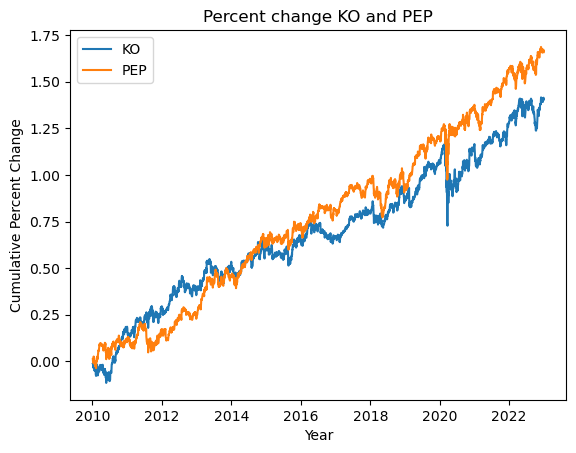

In [12]:
#plot graph
y1 = pct_change["KO"]
y2 = pct_change["PEP"]
plt.plot(x, y1, label="KO")
plt.plot(x, y2, label="PEP")
plt.legend()
plt.title("Percent change KO and PEP")
plt.xlabel("Year")
plt.ylabel("Cumulative Percent Change")

In [13]:
#test with stock A as KO, B as PEP
stockA = data["KO"]
stockB = data["PEP"]

x = sm.add_constant(stockB) #adding alpha
y = stockA 
#now model using OLS
model = sm.OLS(y,x).fit()
#get slope + intercept from model
alpha, beta = model.params